### Кластеризация

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, MeanShift
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore", message="Could not find the number of physical cores") # 

In [45]:
data = pd.read_csv("./datasets/student-por.csv")

#### Используем алгоритм KMeans

In [46]:
model = KMeans(4)
model.fit(data[['G1', 'G2']])

KMeans(n_clusters=4)

In [47]:
def show_data(md, dt):
    plt.scatter(dt['G1'], dt['G2'], c=md.labels_, cmap='rainbow')
    plt.show()

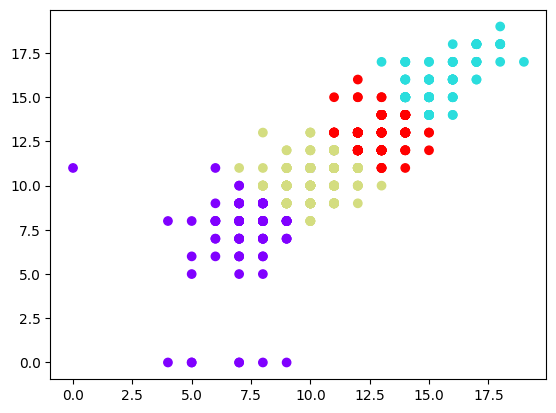

In [48]:
show_data(model, data)

#### Используем алгоритм MeanShift

In [49]:
model = MeanShift(bandwidth=2)
model.fit(data[['G1', 'G2']])

MeanShift(bandwidth=2)

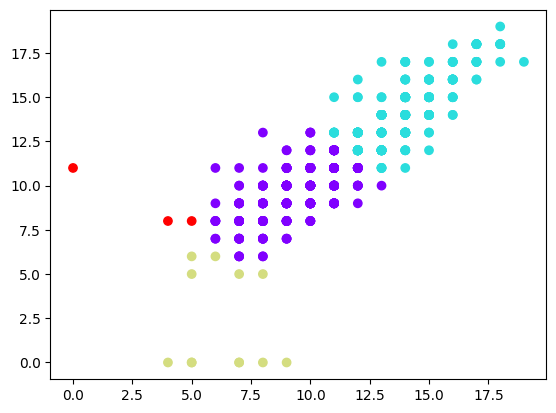

In [50]:
show_data(model, data)

### Работаем с деревьями решений
[Гуд видео про работу DecisionTreeRegressor](https://www.youtube.com/watch?v=0mMeaC3gjNI)

In [51]:
X = data[['famrel', 'freetime', 'goout', 'Dalc', 'Walc']]
y = data['health']

In [61]:
data['health'].unique()

array([3, 5, 1, 2, 4])

In [64]:
criterion = ['gini', 'entropy', 'log_loss']
for cr in criterion:
    model = DecisionTreeClassifier(criterion=cr, random_state=52)
    model.fit(X, y)
    pred_y = model.predict(X)
    print(f'{cr}\nF1_SCORE: {f1_score(y, pred_y, average='macro')}\n'
          f'ACCURACY: {accuracy_score(y, pred_y)}\n')

gini
F1_SCORE: 0.6385865992392141
ACCURACY: 0.6563944530046225

entropy
F1_SCORE: 0.6385865992392141
ACCURACY: 0.6563944530046225

log_loss
F1_SCORE: 0.6385865992392141
ACCURACY: 0.6563944530046225


### Разделение данных

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=52)

In [70]:
criterion = ['gini', 'entropy', 'log_loss']
for cr in criterion:
    model = DecisionTreeClassifier(criterion=cr, random_state=52)
    model.fit(X_train, y_train)
    pred_y_train = model.predict(X_train)
    pred_y_test = model.predict(X_test)
    
    print(f'LOSS ON TRAIN:\ncriterion: {cr}\n'
          f'F1_SCORE: {f1_score(y_train, pred_y_train, average='macro')}\n'
          f'ACCURACY: {accuracy_score(y_train, pred_y_train)}\n')

    print(f'LOSS ON TEST:\ncriterion: {cr}\n'
          f'F1_SCORE: {f1_score(y_test, pred_y_test, average='macro')}\n'
          f'ACCURACY: {accuracy_score(y_test, pred_y_test)}\n')

LOSS ON TRAIN:
criterion: gini
F1_SCORE: 0.6866282202687605
ACCURACY: 0.698237885462555

LOSS ON TEST:
criterion: gini
F1_SCORE: 0.21967802113159288
ACCURACY: 0.26153846153846155

LOSS ON TRAIN:
criterion: entropy
F1_SCORE: 0.6866282202687605
ACCURACY: 0.698237885462555

LOSS ON TEST:
criterion: entropy
F1_SCORE: 0.22658787510839176
ACCURACY: 0.2564102564102564

LOSS ON TRAIN:
criterion: log_loss
F1_SCORE: 0.6866282202687605
ACCURACY: 0.698237885462555

LOSS ON TEST:
criterion: log_loss
F1_SCORE: 0.22658787510839176
ACCURACY: 0.2564102564102564
